# Models

In [1]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

## Load x_train, x_val and x_test

In [2]:
with open('../data/x_train_preproc.pickle', 'rb') as handle:
    x_train = pickle.load(handle)
with open('../data/y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)
with open('../data/x_val_preproc.pickle', 'rb') as handle:
    x_val = pickle.load(handle)
with open('../data/y_val.pickle', 'rb') as handle:
    y_val = pickle.load(handle)
with open('../data/x_test_preproc.pickle', 'rb') as handle:
    x_test = pickle.load(handle)

In [3]:
def prediction(model, x, y):
    y_true = model.predict(x)

    accuracy = accuracy_score(y_true, y)
    confusionMatrix = confusion_matrix(y_true, y)
    f1score = f1_score(y_true,y, average='macro')

    disp = plot_confusion_matrix(model, x, y, normalize = 'true')


    print('accuracy : ', accuracy)
    print('f1score : ', f1score)
    print('-----------------------')
    return accuracy, confusionMatrix, f1score

### Logistic regression

In [4]:
def logisticRegressionModel(x_train, y_train, x_val, y_val):

    parameters = {'penalty':('none', 'l2'), 'max_iter':(100,500,1000), 'class_weight': (None, 'balanced')} #, 'solver': ('liblinear', 'lbfgs')}

    model = GridSearchCV(LogisticRegression(), parameters)
    model.fit(x_train, y_train)
    print(model.best_params_)
    
    accuracy, confusionMatrix, f1score = prediction(model, x_train, y_train)
    accuracy, confusionMatrix, f1score = prediction(model, x_val, y_val)

    return model

{'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'none'}
accuracy :  0.68359375
f1score :  0.6828854169473864
-----------------------
accuracy :  0.6875
f1score :  0.6772435897435898
-----------------------


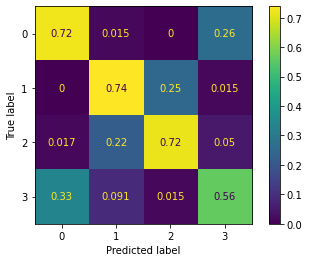

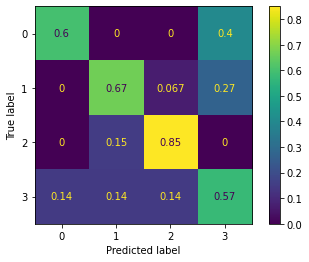

In [5]:
lrModel = logisticRegressionModel(x_train, y_train, x_val, y_val)

### Random Forest Classifier

In [6]:
def randomForestClassifierModel(x_train, y_train, x_val, y_val):

    parameters = {'n_estimators' : [1,750], 'max_depth': [1,4]}

    model = GridSearchCV(RandomForestClassifier(), parameters)
    model.fit(x_train, y_train)
    print(model.best_params_)
    
    scoreTrain = prediction(model, x_train, y_train)
    scoreVal = prediction(model, x_val, y_val)

    return model

{'max_depth': 4, 'n_estimators': 750}
accuracy :  0.828125
f1score :  0.8274761188256301
-----------------------
accuracy :  0.71875
f1score :  0.7166723373619925
-----------------------


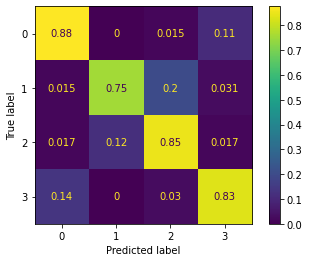

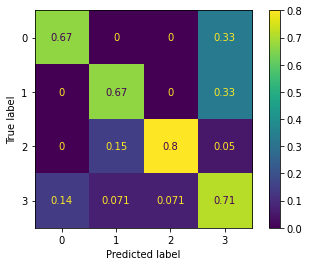

In [7]:
rfModel = randomForestClassifierModel(x_train, y_train, x_val, y_val)

### SVC

In [8]:
def SVCModel(x_train, y_train, x_val, y_val):

    parameters = {'kernel':('linear', 'poly', 'sigmoid', 'rbf'), 'degree':(2,3,4)} #, 'max_iter':(1,50)

    model = GridSearchCV(SVC(), parameters)
    model.fit(x_train, y_train)
    print(model.best_params_)
    
    scoreTrain = prediction(model, x_train, y_train)
    scoreVal = prediction(model, x_val, y_val)

    return model

{'degree': 2, 'kernel': 'rbf'}
accuracy :  0.765625
f1score :  0.7653900785040793
-----------------------
accuracy :  0.78125
f1score :  0.7755360623781677
-----------------------


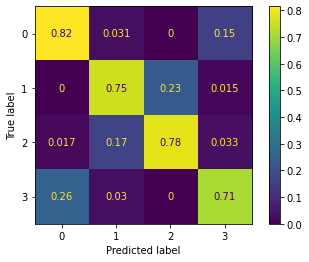

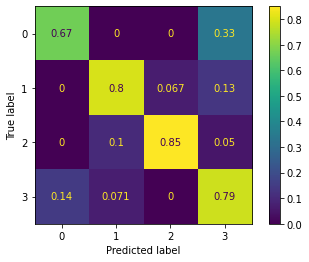

In [9]:
svcModel = SVCModel(x_train, y_train, x_val, y_val)

### KNeighborsClassifier

In [10]:
def KNNModel(x_train, y_train, x_val, y_val):

    parameters = {'n_neighbors': (4,5), 'leaf_size': (30, 50), 'p': (1,2) }
    model = GridSearchCV(KNeighborsClassifier(), parameters)
    model.fit(x_train, y_train)
    print(model.best_params_)
    
    scoreTrain = prediction(model, x_train, y_train)
    scoreVal = prediction(model, x_val, y_val)

    return model

{'leaf_size': 30, 'n_neighbors': 4, 'p': 1}
accuracy :  0.7265625
f1score :  0.7153624215452344
-----------------------
accuracy :  0.640625
f1score :  0.6049686049686049
-----------------------


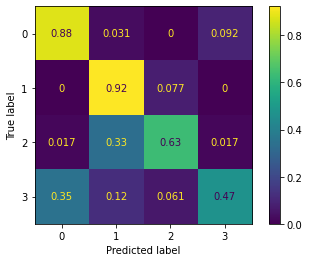

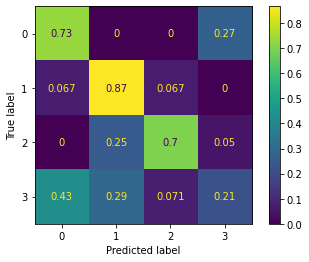

In [11]:
knnModel = KNNModel(x_train, y_train, x_val, y_val)

## Save best model

In [12]:
with open('../data/model.pickle', 'wb') as handle:
    pickle.dump(svcModel, handle, protocol=pickle.HIGHEST_PROTOCOL)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2011f815-0780-43fd-b5d6-053a5c8d7739' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>